### Problem Statement
In this assignment students have to compress racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look for quality difference.

The raw image is available in spicy.misc package with the name face.

Hint:

- import numpy as np
- from sklearn import cluster, datasets
- from scipy import misc

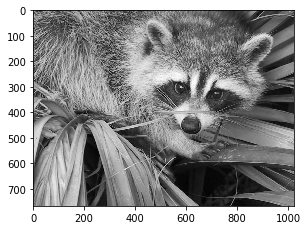

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline

# Visualize the gray scale image

f = scipy.misc.face(gray=True)
plt.figure(figsize=(10, 3.6))
plt.imshow(f, cmap=plt.cm.gray)
plt.show()



768 1024
[[ 75.41095451]
 [154.76643393]
 [115.47899819]
 [ 27.62031146]
 [195.41684458]]
[[2 2 1 ... 2 2 1]
 [0 2 2 ... 2 2 1]
 [0 0 2 ... 2 2 1]
 ...
 [2 2 2 ... 1 1 1]
 [0 2 2 ... 1 1 1]
 [0 2 2 ... 1 1 1]]


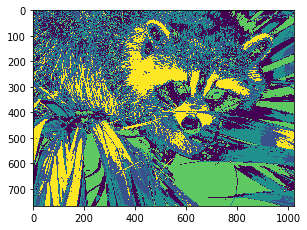

In [3]:
# Compressing the gray scale image into 5 clusters

rows = f.shape[0]
cols = f.shape[1]

print(rows,cols)

image = f.reshape(rows*cols,1)
kmeans = KMeans(n_clusters = 5)
kmeans.fit(image)

clusters = np.asarray(kmeans.cluster_centers_) 

# Printing the clusters center
print(clusters)

labels = np.asarray(kmeans.labels_)  
labels = labels.reshape(rows,cols); 

# Creating the array of rown and columns by reshaping it

print (labels)    
    
#np.save('codebook_racoon.npy',clusters)
plt.imsave('compressed_racoon.png',labels);

# Visualize the compressed image

image = plt.imread('compressed_racoon.png')
plt.figure(figsize=(10, 3.6))
plt.imshow(image)
plt.show()

# Image with 5 clusters

In [4]:
print(__doc__)

# Author: Gael Varoquaux <gael.varoquaux@normalesup.org>, Brian Cheung
# License: BSD 3 clause

import time

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering


# load the raccoon face as a numpy array
try:  # SciPy >= 0.16 have face in misc
    from scipy.misc import face
    face = face(gray=True)
except ImportError:
    face = sp.face(gray=True)

# Resize it to 10% of the original size to speed up the processing
face = sp.misc.imresize(face, 0.10) / 255.

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(face)

# Take a decreasing function of the gradient: an exponential
# The smaller beta is, the more independent the segmentation is of the
# actual image. For beta=1, the segmentation is close to a voronoi
beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

# Apply spectral clustering (this step goes much faster if you have pyamg
# installed)
N_REGIONS = 25

Automatically created module for IPython interactive environment


C:\Users\prashant_gupta1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


C:\Users\prashant_gupta1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


Spectral clustering: kmeans, 5.87s
Spectral clustering: discretize, 4.47s


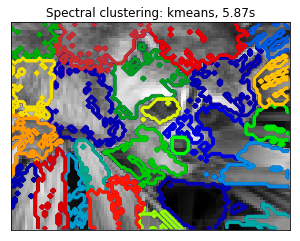

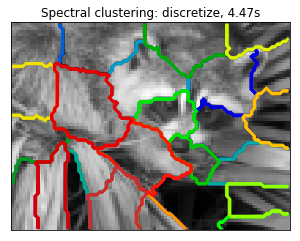

In [5]:
for assign_labels in ('kmeans', 'discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                                 assign_labels=assign_labels, random_state=1)
    t1 = time.time()
    labels = labels.reshape(face.shape)

    plt.figure(figsize=(5, 5))
    plt.imshow(face, cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels == l, contours=1,
                    colors=[plt.cm.nipy_spectral(l / float(N_REGIONS))])
    plt.xticks(())
    plt.yticks(())
    title = 'Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0))
    print(title)
    plt.title(title)
plt.show()
